<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
---

## 핵심 키워드
---
- 선형 회귀
- 계수 또는 가중치
- 모델 파라미터
- 다항 회귀


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

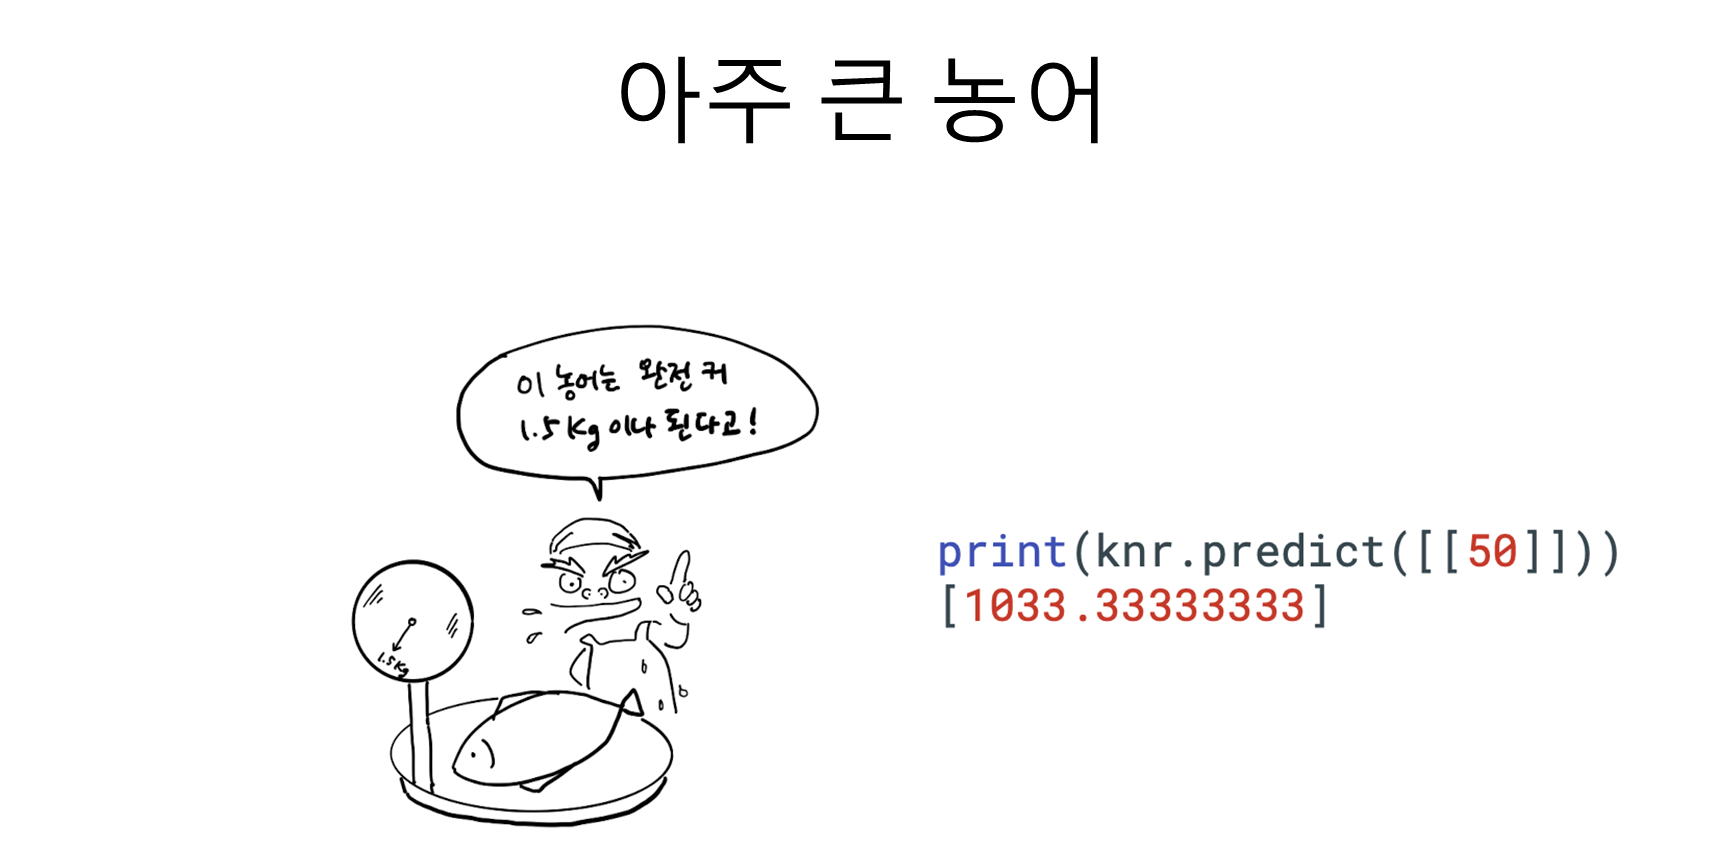

## k-최근접 이웃의 한계
---
- 데이터 : http://bit.ly/perch_data

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

**길이 50cm 농어의 무게 예측**

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


In [5]:
import matplotlib.pyplot as plt

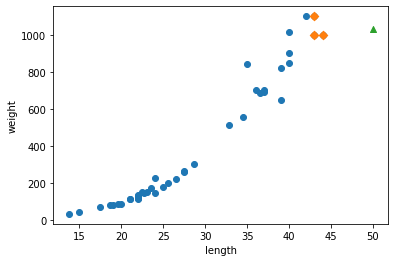

In [6]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**최근접 이웃 3개 주황색 점의 평균값**

In [7]:
print(np.mean(train_target[indexes]))

1033.3333333333333


**길이 100cm 농어의 무게 예측**

In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


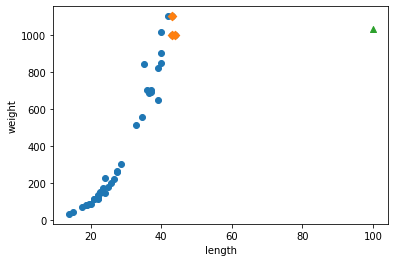

In [ ]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

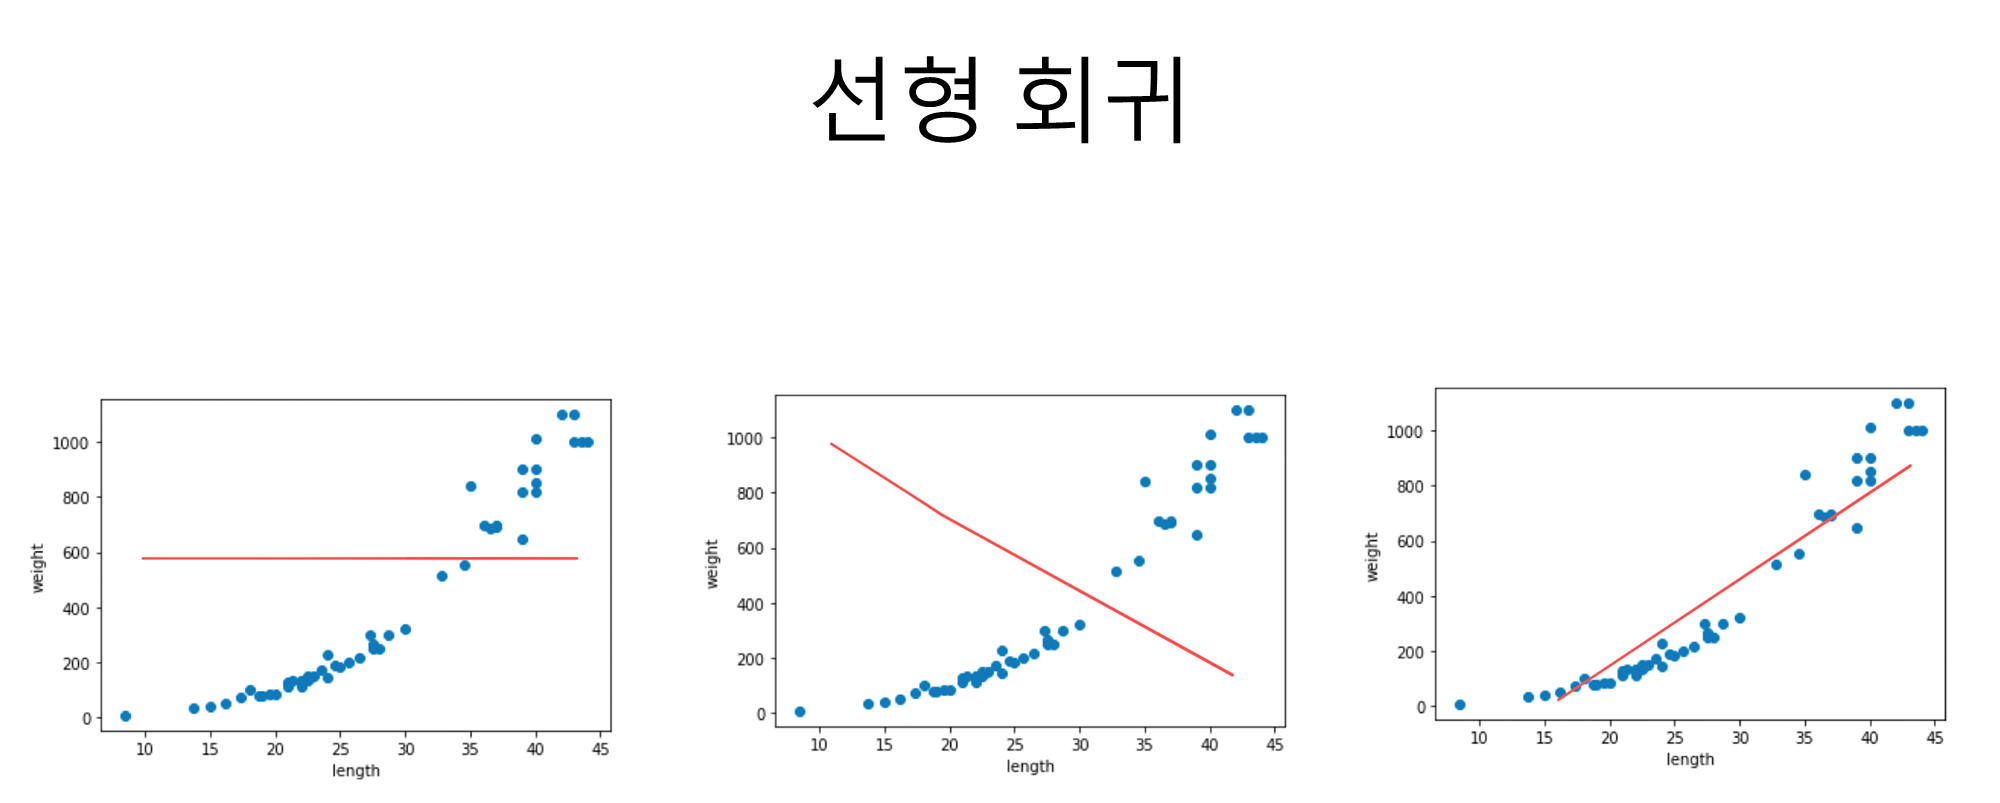

## 선형 회귀 linear regression
---
- 대표적인 회귀 알고리즘
- 특성을 가장 잘 나타낼 수 있는 직선을 학습하는 알고리즘

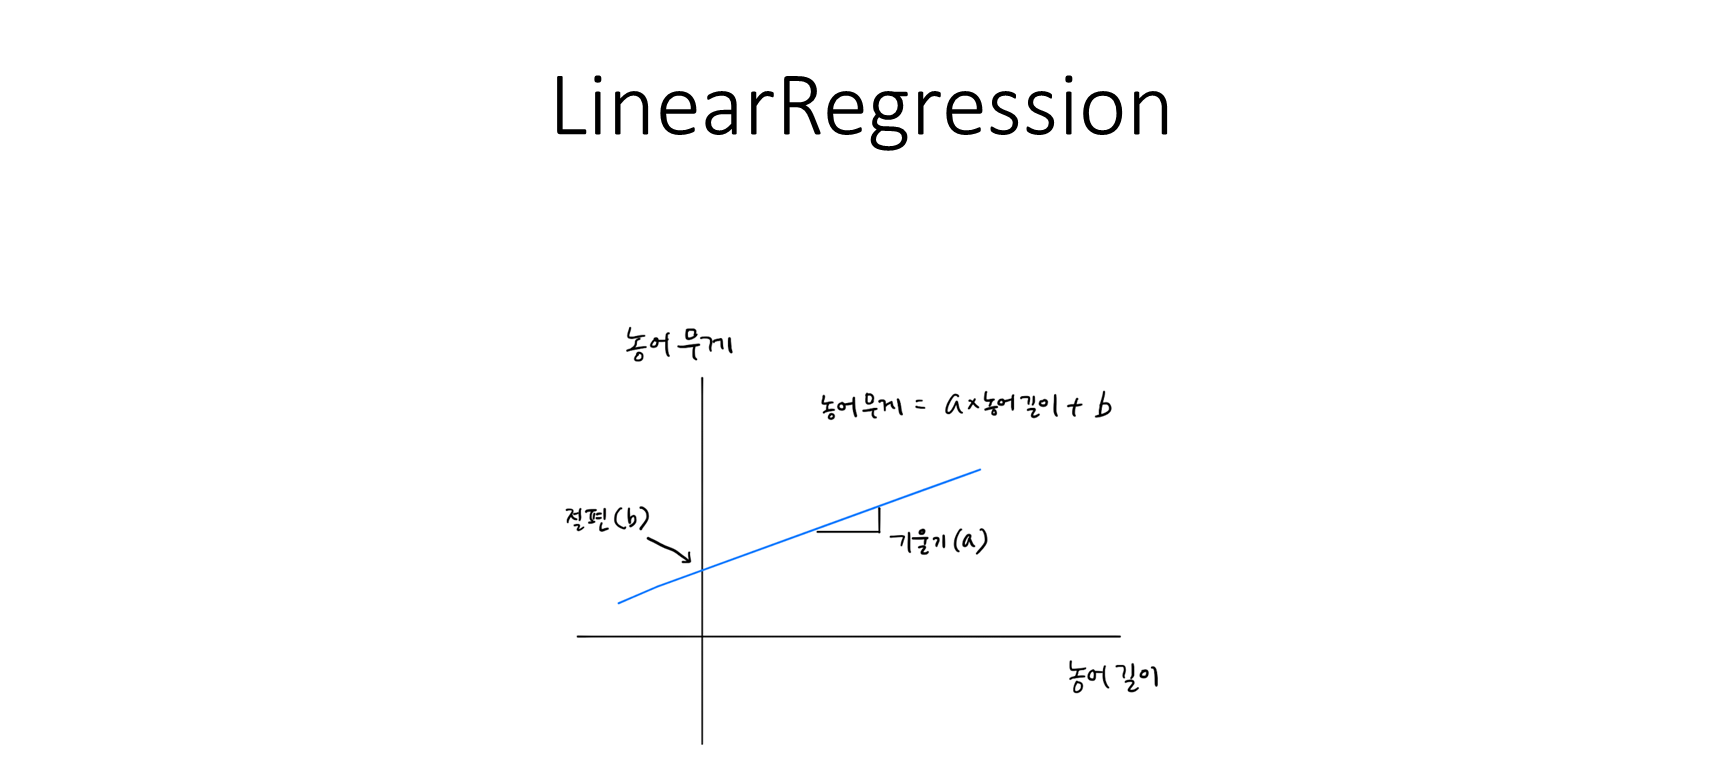

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [10]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [11]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


### 모델 파라미터 model parameter
---
- 머신러닝 알고리즘이 찾은 값
- coef (기울기, 계수, 가중치)와 instercept (절편)
- 훈련이란 결국 최적의 모델 파라미터를 찾는 것
- k-최근접 이웃 알고리즘은 모델파라미터가 없이 모든  훈련세터를 저장하는 방식으로 사례기반학습이라고 함


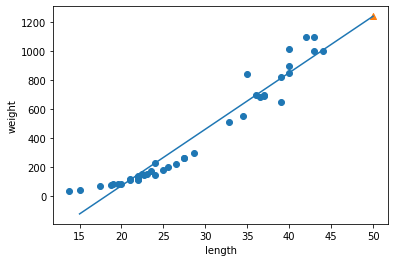

In [ ]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> **훈련세트 점수가 더 많이 높아서 과대적합되었지만 훈련세트 점수도 높지 않아 전체적으로는 과소적합**

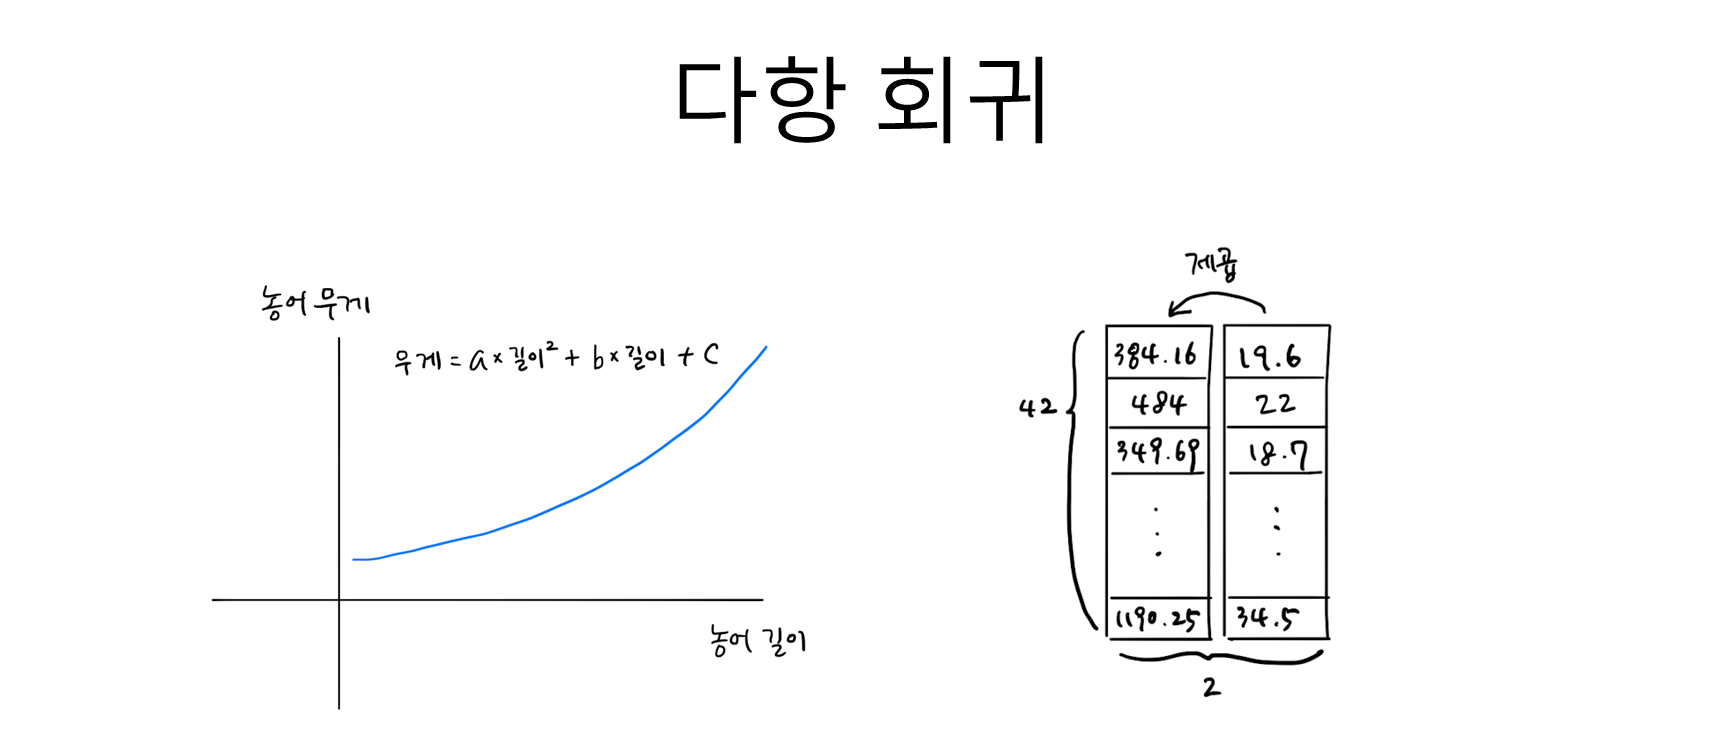

## 다항 회귀 polynomial regression
---
- 다항식을 사용한 선형 회귀
- 다항 회귀는 속성과 계수의 관계가 선형
- 농어의 길이와 무게에 대한 산점도를 자세히 보면 곡선에 가까움
- 길이의 제곱항을 추가 해줌 => 복잡도를 높임





In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


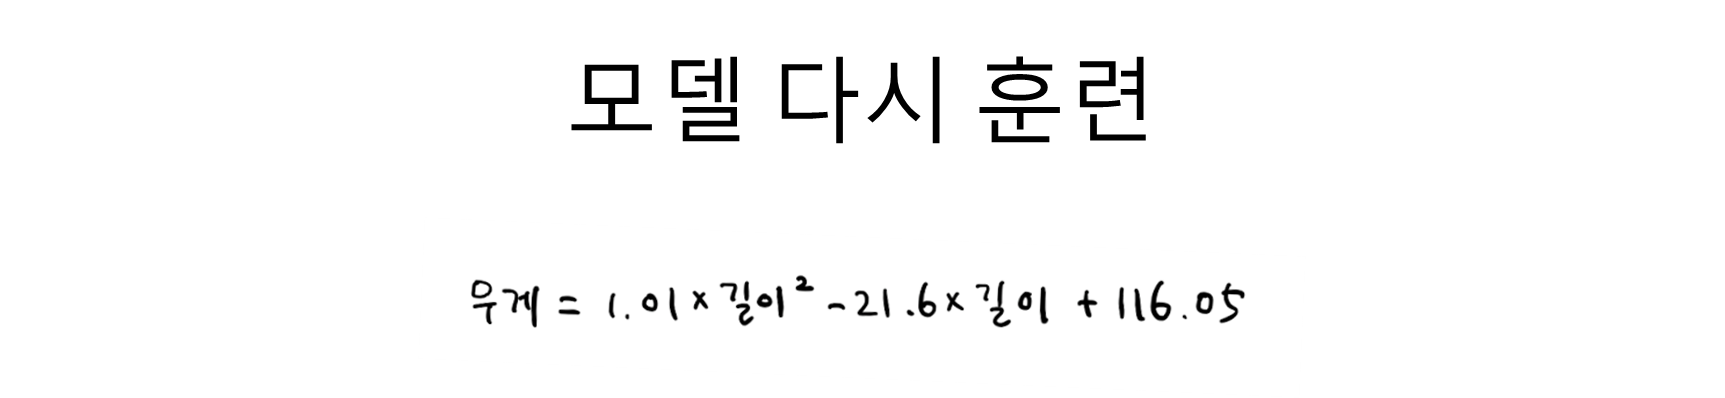

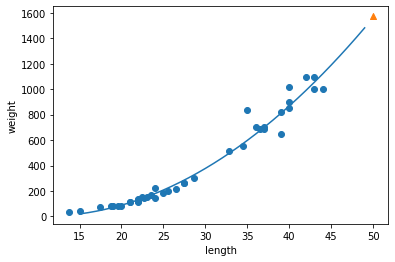

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 확인 문제
---
- 차수 degree를 변화 시키면서 확인해 보기

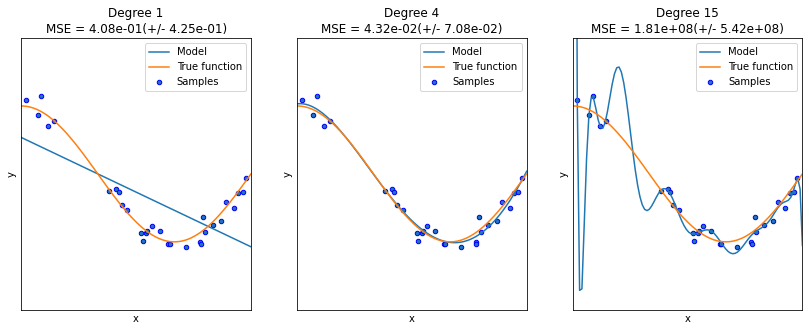

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## 마무리
---

### 키워드
- 선형 회귀 : 특성과 타깃 사이에 관계를 가장 잘 나타내는 선형 방정식의 계수(가중치) 절편 찾기
- 모델 파라미터 : 가중치 처럼 머신러닝 모델이 특성에서 학습한 파라미터
- 다항 회귀: 다항식을 사용하여 특성과 타깃 사이의 관계를 나타내고 이 함수는 비선형일 수 있지만 선형회귀 처럼 표현 됨

### 핵심 패키지와 함수
---

#### scikit-learn
- LinearrRegression : 선현 회귀 클래스
- 매개변수 fit_intercept=False : 절편 학습 안함, 기본값 True
- coef_ : 특성의 계수를 포함한 배열, 배열의 크기는 특성의 개수
- intercept_ : 절편 저장